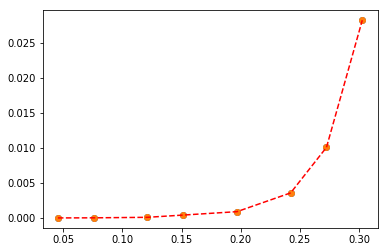

In [1]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy
from scipy import interpolate
from scipy.interpolate import CubicSpline
from scipy.optimize import fsolve

# solution

#****Data***#
# Eqb. data
# Data = [Benzene vapor adsorbed cm3 (STP)/g charcoal,Partial pressure of benzene in nitrogen-benzene vapor mixture(mm Hg)]
Data = [(15,0.001),( 25, 0.0045),(40 ,0.0251),(50 ,0.115),(65, 0.251),(80, 1.00),(90, 2.81),(100, 7.82)];
P = 760.0;# [mm Hg]
# Initial gas
T = 273+33.0;# [K]
#******#

# Y = kg water/kg dry air
# X = kg water/kg dry soap
# E = Benzene-N2 phase
# R = Benzene-charcoal phase
Ye = numpy.zeros(8);
Xe = numpy.zeros(8);
for i in range(0,8):

    Ye[i] = Data[i][1]/(P-Data[i][1])*(76.11/28);
    Xe[i] = Data[i][0]*10**(-3)*(760*76.11/62.36367/(273+33.3));

    
plt.plot(Xe, Ye, 'o', label='data')
   
Yeq = CubicSpline(Xe, Ye)

plt.plot(Xe, Ye, 'o', label='data')
plt.plot(Xe, Yeq(Xe), 'r--', label="S")



In [2]:
# 1.0% benzene by volume in entering nitrogen-benze vapor mixture
ymol=0.01
y2=0.01*76.11/(0.01*76.11+0.99*28)
Y2=y2/(1-y2)

X1 = 15*10**(-3)*(760*76.11/62.36367/(273+33.3));


Y1=0.05*Y2

Es=(4.72*10**(-2))*(760)*28/62.36367/(273+33.3)

print("X1=",X1)
print("Y1=",Y1)
print("Y2=",Y2)




X1= 0.04542217348347319
Y1= 0.001372835497835498
Y2= 0.02745670995670996


x2= [ 0.30189879]


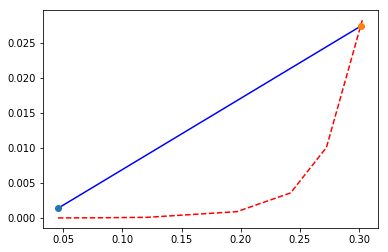

In [3]:
Xeq = fsolve(lambda X:Yeq(X) - Y2, 0.3)

plt.plot(Xe, Yeq(Xe), 'r--', label="S")
plt.plot([X1,Xeq], [Y1,Y2], 'b', label='data')
plt.plot(X1, Y1, 'o', label='data')
plt.plot(Xeq, Y2, 'o', label='data')

print('x2=',Xeq)

In [4]:
slopemin=(Y2-Y1)/(Xeq-X1)
print(slopemin)

[ 0.10170079]


In [5]:
Rsmin=Es*slopemin
print(Rsmin)

[ 0.0053476]


In [6]:
Rs=Rsmin*2
slope=Rs/Es
print(Rs)

[ 0.01069521]


In [7]:
X2=(Y2-Y1)/slope+X1
print(X2)

[ 0.17366048]


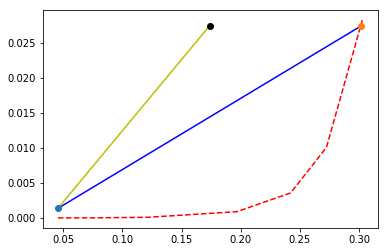

In [8]:
plt.plot(Xe, Yeq(Xe), 'r--', label="S")
plt.plot([X1,Xeq], [Y1,Y2], 'b', label='data')
plt.plot([X1,X2], [Y1,Y2], 'y', label='data')
plt.plot(X1, Y1, 'o', label='data')
plt.plot(Xeq, Y2, 'o', label='data')
plt.plot(X2, Y2, 'ko', label='data')